In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import joblib
from google.colab import files


from google.colab import drive
drive.mount('/content/drive')


# Load the crop recommendation dataset
crop_df = pd.read_csv('/content/drive/MyDrive/Dataset/Crop_recommendation.csv')
print("Crop Recommendation Data")
print(crop_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Crop Recommendation Data
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
# Dataset shape and preview
print("Dataset shape:", crop_df.shape)
crop_df.head()


Dataset shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print("Missing values in the dataset:")
print(crop_df.isnull().sum())


Missing values in the dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
duplicates = crop_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


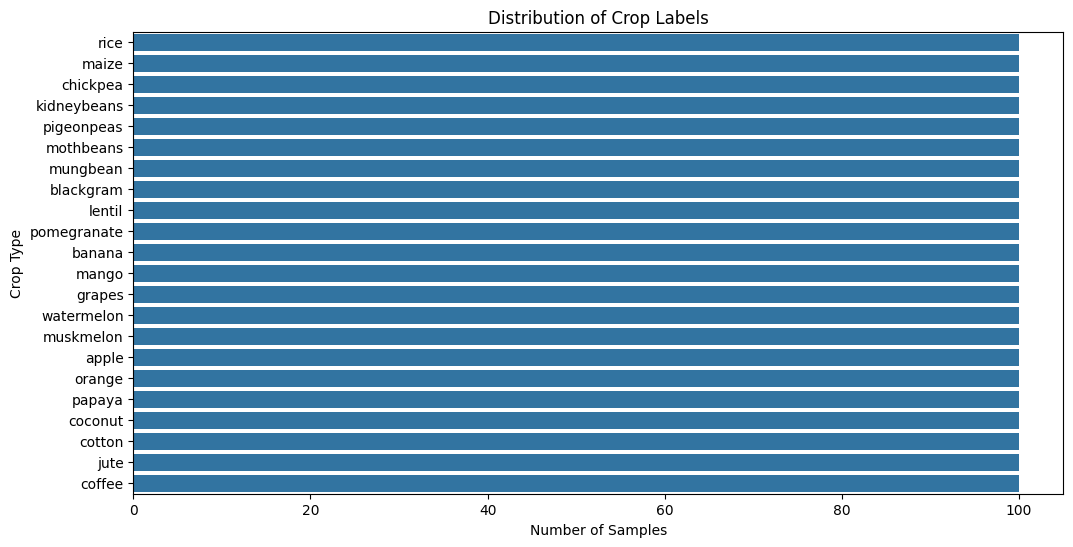

In [ ]:
crop_counts = crop_df['label'].value_counts()
print(crop_counts)

# Plot
plt.figure(figsize=(12,6))
sns.countplot(y='label', data=crop_df, order=crop_counts.index)
plt.title("Distribution of Crop Labels")
plt.xlabel("Number of Samples")
plt.ylabel("Crop Type")
plt.show()


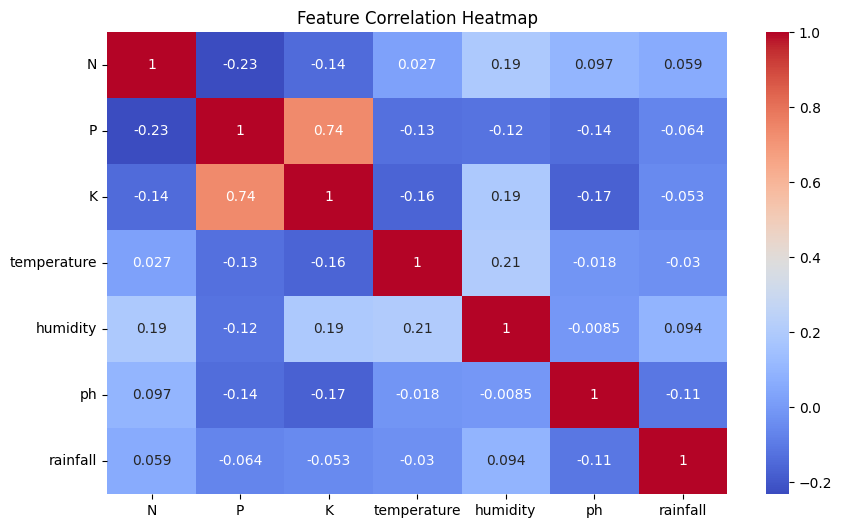

In [ ]:
plt.figure(figsize=(10,6))
# Select only numerical features for correlation calculation
numerical_features = crop_df.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

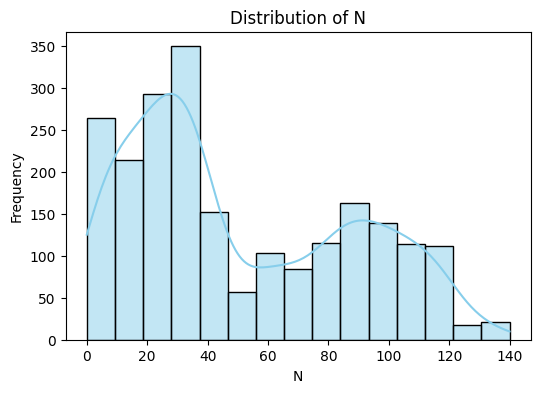

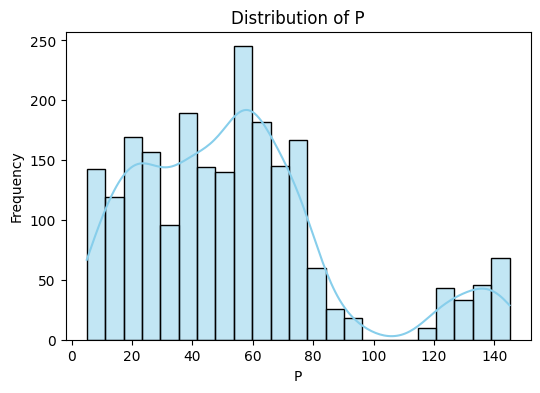

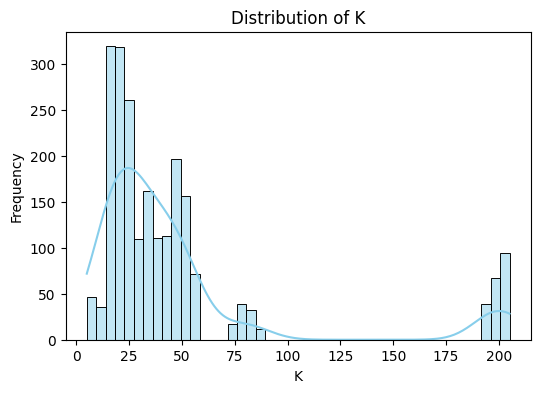

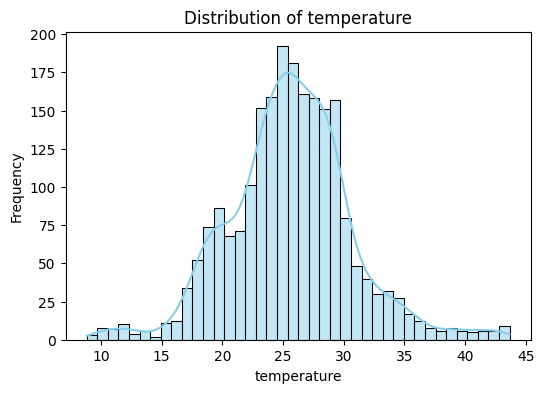

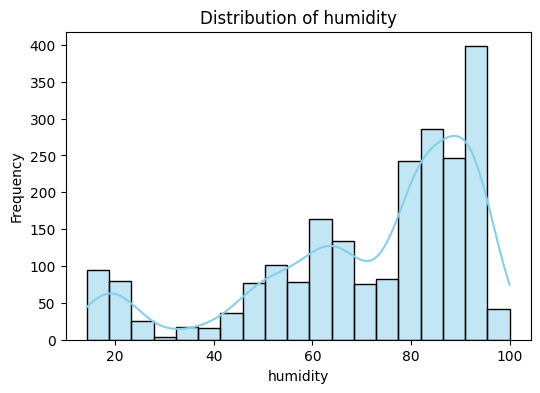

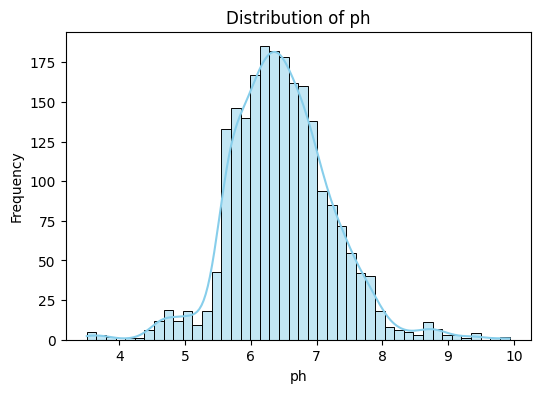

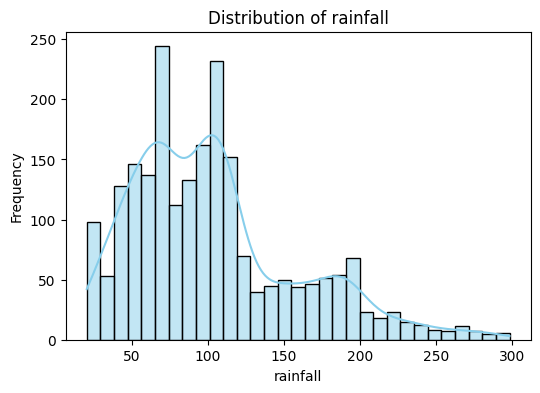

In [ ]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(crop_df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Step 1: Features and Target
X = crop_df.drop('label', axis=1)  # X = all input features
y = crop_df['label']               # y = target crop

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Target (y):
0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [ ]:
# Step 2: Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 1760
Testing set size: 440


In [ ]:
# Step 3: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [ ]:
# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Step 5: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 99.32%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1

In [ ]:
joblib.dump(model, "crop_recommendation_model.pkl")

['crop_recommendation_model.pkl']

In [ ]:
files.download('crop_recommendation_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>